## 1. Load Required Libraries

In [1]:
import src.util as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pickle
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import warnings
warnings.simplefilter(action = "ignore") 

## 2. Load Configuration File

In [2]:
config = utils.load_config()

## 3. Load Train and Valid Set

In [3]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## 4. Model Training

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
x_train

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,50,6,148,72,35,0,33.6,0.627
165,41,6,104,74,18,156,29.9,0.722
201,28,1,138,82,0,0,40.1,0.236
197,23,3,107,62,13,48,22.9,0.678
195,29,5,158,84,41,210,39.4,0.395
...,...,...,...,...,...,...,...,...
506,35,0,180,90,26,90,36.5,0.314
404,41,5,168,64,0,0,32.9,0.135
498,55,7,195,70,33,145,25.1,0.163
500,21,2,117,90,19,71,25.2,0.313


## 6. Evaluation and Metrics

In [8]:
y_pred = dtc.predict(x_valid)

In [9]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        75
           1       0.57      0.60      0.59        40

    accuracy                           0.70       115
   macro avg       0.68      0.68      0.68       115
weighted avg       0.71      0.70      0.71       115



In [10]:
y_pred = dtc.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        75
           1       0.59      0.63      0.61        41

    accuracy                           0.72       116
   macro avg       0.69      0.70      0.69       116
weighted avg       0.72      0.72      0.72       116



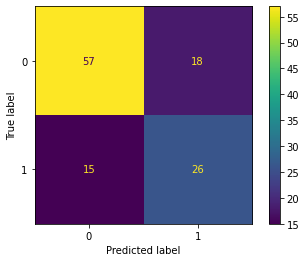

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 6. Dump Model Object

In [13]:
#utils.pickle_dump(dtc, config["production_model_path"])

In [14]:
#model = utils.pickle_load("models/production_model.pkl")

In [15]:
with open('models/dtc_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)
    
with open('models/dtc_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [16]:
# with open('models/dtc_model.pkl', 'wb') as file:
#     joblib.dump(dtc, file)
    
# with open('models/dtc_model.pkl', 'rb') as file:
#     model = joblib.load(file)

In [17]:
y_pred = model.predict(x_valid)

In [18]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1], dtype=int64)

In [19]:
valid_set = pd.concat([x_valid, y_valid], axis = 1)

In [20]:
valid_set["pred"] = y_pred

In [21]:
valid_set

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,pred
418,27,1,83,68,0,0,18.2,0.624,0,0
235,26,4,171,72,0,0,43.6,0.479,1,1
373,25,2,105,58,40,94,34.9,0.225,0,0
330,46,8,118,72,19,0,23.1,1.476,0,0
64,42,7,114,66,0,0,32.8,0.258,1,1
...,...,...,...,...,...,...,...,...,...,...
151,37,4,114,65,0,0,21.9,0.432,0,0
535,23,4,132,0,0,0,32.9,0.302,1,0
82,36,7,83,78,26,71,29.3,0.767,0,0
25,41,10,125,70,26,115,31.1,0.205,1,0


In [22]:
a = np.array([23, 2, 94, 76, 18, 66, 31.6, 0.649]).reshape(1, -1)

In [23]:
model.predict(a)

array([1], dtype=int64)